In [1]:
import torch
from numpy import loadtxt,sqrt,ceil
from matplotlib import pyplot as plt
from basis import *


In [2]:
torch.manual_seed(42)
mu_a,sig_a = 10,1
shape,scale = 3,1
N = 10000
x = torch.tensor(loadtxt('datasets/N_{}_{}_G_{}_{}.csv'.format(mu_a,sig_a,shape,scale))[:N]).float().to(device)

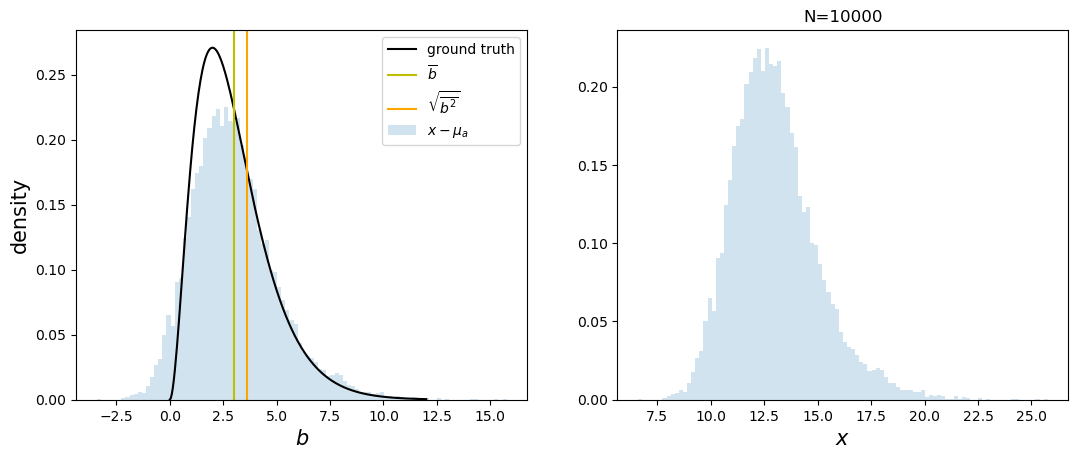

In [3]:
fig,ax = plt.subplots(1,2,figsize=(2*6.4,4.8))
xb = torch.linspace(1e-3,12,251).to(device)

ax[0].plot(xb.cpu(),torch.exp(logprob_gamma(xb,torch.tensor(shape).cpu(),torch.tensor(scale).cpu())).cpu(),label=r'ground truth',color='k')
ax[0].axvline(x.mean().cpu()-mu_a,color='y',label=r'$\overline{ b} $')
ax[0].axvline(torch.sqrt((x**2).mean().cpu()-2*mu_a*x.mean().cpu()+mu_a**2),color='orange',label=r'$\sqrt{\overline{ b^2}}$')
ax[0].hist(x.cpu()-mu_a,bins=int(ceil(sqrt(x.size(0)))),alpha=.2,density=True,label=r'$x - \mu_a$')


ax[0].legend()
ax[0].set_ylabel('density',fontsize=15)
ax[0].set_xlabel(r'$b$',fontsize=15)

ax[1].hist(x.cpu(),bins=int(ceil(sqrt(x.size(0)))),alpha=.2,density=True)
ax[1].set_title('N={}'.format(N))
ax[1].set_xlabel(r'$x$',fontsize=15)
plt.savefig('graphs/fig1.png'.format(mu_a,sig_a,shape,scale,N),dpi=600)

In [4]:
import numpy as np

class fx:
    def __init__(self,x,bins=None):
        if bins is None:
            bins=int(ceil(sqrt(x.size())))
        self.h,xlim = np.histogram(x,bins=bins,density=True)
        self.xend = xlim[1:]
        self.xbeg = xlim[:-1]
    def __call__(self,k):
        return sum([(hi/(-1j*(k+1e-15)))*(np.exp((-1j)*k*xe)-np.exp((-1j)*k*xb)) for (hi,xe,xb) in zip(self.h,self.xend,self.xbeg)])

In [5]:
Fourier_x=fx(x)

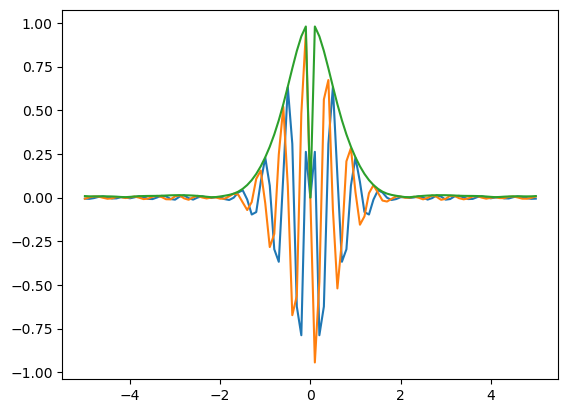

In [6]:

k = np.linspace(-1,1,101)*5
fkx = Fourier_x(k)
fka = np.exp((-1j)*k*mu_a)*np.exp(-(np.pi**2)*(k**2)*2*(sig_a**2))
plt.plot(k,np.real(fkx))
plt.plot(k,np.imag(fkx))
plt.plot(k,np.abs(fkx))

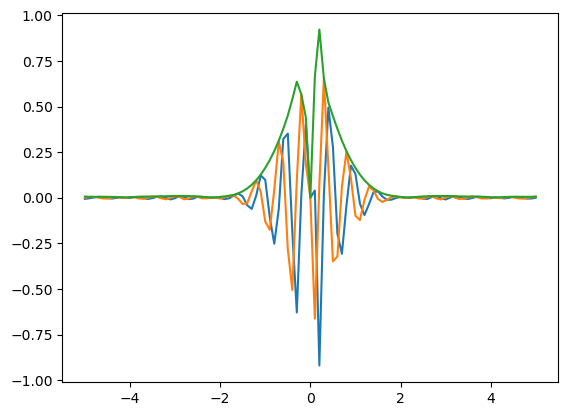

In [7]:
fkb = fkx/(fka+(1+1j))
plt.plot(k,np.real(fkb))
plt.plot(k,np.imag(fkb))
plt.plot(k,np.abs(fkb))

In [8]:
def ifft(fkb,k):
    return np.fft.ifft(np.concatenate((fkb[k.size//2:],fkb[:k.size//2])))
    

/home/pessoa/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


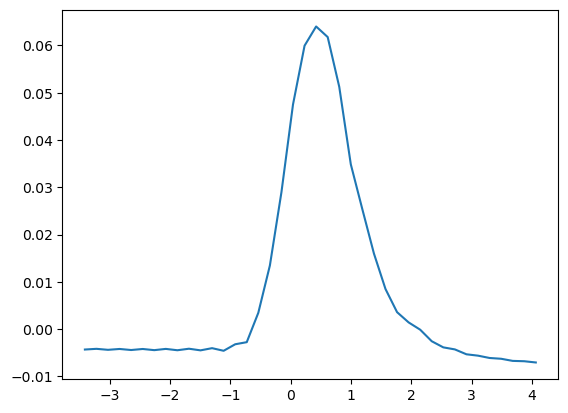

In [9]:
plt.plot(Fourier_x.xbeg[:40]-mu_a,ifft(fkb,k)[:40])